In [13]:
# 环境引入
import numpy as np, numpy.linalg as ng
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, tplquad
from scipy.optimize import fsolve, fminbound, fmin, minimize

1. 泰勒级数

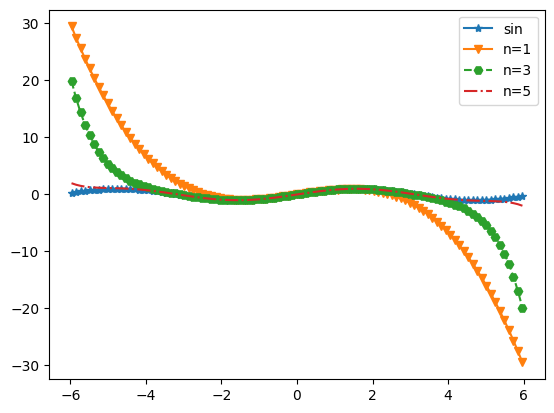

In [7]:
# 画出sinx泰勒展开的图像
fac = lambda n: 1 if n < 1 else n * fac(n - 1)
item = lambda n, x: (-1)**n * x**(2*n + 1) / fac(2 * n + 1)
mysin = lambda n, x: 0 if n < 0 else mysin(n-1, x) + item(n, x) # 通过泰勒展开计算函数值

x = np.linspace(-1.9 * np.pi, 1.9 * np.pi, 101)
plt.plot(x, np.sin(x), '*-')

strs = ['v-', 'H--', '-.']

for n in range(1, 4):
    plt.plot(x, mysin(2 * n - 1, x), strs[n - 1])
plt.legend(['sin', 'n=1', 'n=3', 'n=5'])

plt.show()

2. 数值导数

利用泰勒级数可以给出近似计算函数导数的方法
下面给出四人对角相向行走问题的求解

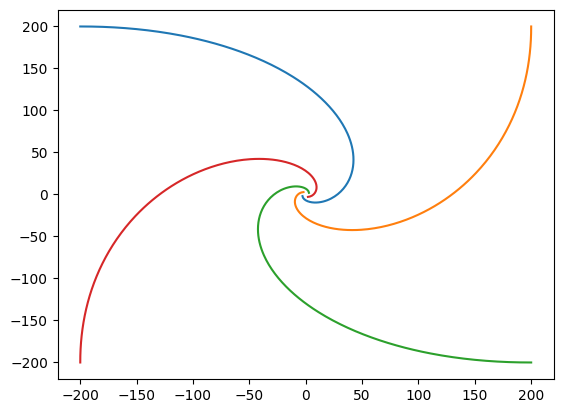

In [9]:
N = 4
v = 1.0
d = 200.
time = 400.
divs = 201

xy = np.array([[-d, d], [d, d], [d, -d], [-d, -d]])
T = np.linspace(0, time, divs)
dt = T[1] - T[0]

xyn = np.empty((4, 2))
Txy = xy 
for n in range(1, len(T)):
    for i in range(4):
        j = (i + 1) % 4
        dxy = xy[j] - xy[i]
        dd = dxy / ng.norm(dxy) # 单位化向量
        xyn[i] = xy[i] + dt * v * dd 
    Txy = np.c_[Txy, xyn]; xy = xyn.copy() # 按列连接两个数组
for i in range(N): plt.plot(Txy[i, ::2], Txy[i, 1::2]) # 从第一个开始按步长为2开始索引
plt.show()

3.5.2. 整数积分
1. 一重积分

In [12]:
# 三种积分方法
def trapezoid(f, n, a, b): # 梯形公式
    xi = np.linspace(a, b, n); h = (b-a)/(n-1)
    return h * (np.sum(f(xi)) - (f(a) + f(b)) / 2 )
def simpson(f, n, a, b): # 辛普森公式
    xi, h = np.linspace(a, b, 2 * n + 1), (b - a)/(2. * n)
    xe = [f(xi[i]) for i in range(len(xi)) if i % 2 == 0]
    xo = [f(xi[i]) for i in range(len(xi)) if i % 2 != 0]
    return h * (2 * np.sum(xe) + 4 * np.sum(xo) - f(a) - f(b)) / 3.0

a = 0; b = 1; n = 1000
f = lambda x: np.sin(np.sqrt(np.cos(x) + x**2))

print(f'梯形积分:{trapezoid(f, n, a, b)}')
print(f'simpson:{simpson(f, n, a, b)}')
print(f'scipy quad:{quad(f, a, b)}')


梯形积分:0.8803354297105352
simpson:0.8803354170924643
scipy quad:(0.8803354170924643, 9.773686494490445e-15)


2. 多重积分

多重积分使用scipy种的函数dblquad, tplquad直接求数值解, 其中dblquad参数解释如下:
[a, b]为最外层x积分范围, 内层y积分范围是[gfun(x), hfun(x)], func格式为fun(y, x)

In [5]:
f1 = lambda y, x: x * y**2 # 参数顺序记得写对

f2 = lambda y, x: np.exp(-x**2 / 2) * np.sin(x**2 + y)

print(f'f1:{dblquad(f1, 0, 2, 0, 1)}')
bd = lambda x: np.sqrt(1 - x**2)

print(f'f2:{dblquad(f2, -1, 1, lambda x: -bd(x), bd)}')

f1:(0.6666666666666667, 7.401486830834377e-15)
f2:(0.5368603826989582, 3.696155159715886e-09)


In [6]:
f = lambda z, y, x: z * np.sqrt(x**2 + y**2 + 1)

ybd = lambda x: np.sqrt(2*x - x**2)
print(f'f:{tplquad(f, 0, 2, lambda x: -ybd(x), ybd, 0, 6)}')

f:(87.45019779526699, 8.742462398458883e-08)


3. 使用scipy求非线性方程组

In [8]:
f = lambda x: x**3 + 1.1 * x**2 + 0.9 * x - 1.4
print(f'solve:{fsolve(f, 0)}')

solve:[0.67065731]


In [12]:
f = lambda x:[5 * x[1]+3, 4*x[0]**2 - 2*np.sin(x[1] * x[2]), x[1]*x[2] - 1.5]

print(f'result=', fsolve(f, [1.0, 1.0, 1.0])) # 给一个初值

result= [-0.70622057 -0.6        -2.5       ]


函数极值点的数值解

In [17]:
f = lambda x: np.exp(x) * np.cos(2 * x)

x0 = fminbound(f, 0, 3) # 求在0, 3之间的最小值

print('min is', x0, f(x0))

min is 1.8026199149262752 -5.425165227463772


求一个函数在0附近的最小值

In [18]:
f = lambda x: np.exp(x) * np.cos(2 * x)
x0 = fmin(f, 0)
print(x0)

Optimization terminated successfully.
         Current function value: -0.234443
         Iterations: 26
         Function evaluations: 52
[-1.339]


多元函数的极值点

In [19]:
f = lambda x: 100 * (x[1] - x[0]**2)**2 + (1-x[0])**2
x0 = minimize(f, [2.0, 2.0])

print(f'min point is {x0.x}, min value is {x0.fun}')

min point is [0.99999565 0.99999129], min value is 1.8932681887175893e-11
